# 주식 데이터 예측(LSTM)

## 1. 데이터 다운로드

In [848]:
# pip install yfinance 
# pip install pandas_datareader

In [849]:
import yfinance as yf
from datetime import date, timedelta 

yesterday = date.today() - timedelta(days=1)
end_date = yesterday.strftime("%Y-%m-%d") 

start = yesterday - timedelta(days=365*5)
start_date = start.strftime("%Y-%m-%d")

print(start_date, end_date)

2020-02-19 2025-02-17


In [850]:
data = yf.download(
    tickers = "005930.KS",
    start = start_date, 
    end = end_date
)

data = data.iloc[:,0:4]
data = data[["Open", "High", "Low", "Close"]]
data

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close
Ticker,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,
2020-02-19,52536.037596,53063.155030,52184.625973,52887.449219
2020-02-20,53326.712513,53853.829935,52360.330573,52711.742188
2020-02-21,51657.506361,52536.035381,51393.947655,52008.917969
2020-02-24,50427.566640,51042.536965,49900.449219,49900.449219
2020-02-25,49373.325062,50954.677110,49373.325062,50866.824219
...,...,...,...,...
2025-02-10,53000.000000,55900.000000,52900.000000,55600.000000
2025-02-11,55500.000000,56300.000000,55000.000000,55700.000000


In [851]:
data.shape

(1225, 4)

## 2. 데이터 전처리

In [852]:
train_ratio = 0.7
train_size = int(data.shape[0] * train_ratio)
print(train_size)

857


In [853]:
seq_length = 7

train_set = data.iloc[0:train_size]
test_set = data.iloc[train_size-seq_length:]

print(train_set.shape)
print(test_set.shape)

(857, 4)
(375, 4)


In [854]:
train_set

Price,Open,High,Low,Close
Ticker,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,
2020-02-19,52536.037596,53063.155030,52184.625973,52887.449219
2020-02-20,53326.712513,53853.829935,52360.330573,52711.742188
2020-02-21,51657.506361,52536.035381,51393.947655,52008.917969
2020-02-24,50427.566640,51042.536965,49900.449219,49900.449219
2020-02-25,49373.325062,50954.677110,49373.325062,50866.824219
...,...,...,...,...
2023-08-01,67938.883735,69004.971783,67841.966640,68908.054688
2023-08-02,68520.383606,68811.134880,67648.129784,67745.046875


In [855]:
test_set

Price,Open,High,Low,Close
Ticker,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,
2023-07-28,69586.473885,70167.976452,67938.883277,68423.468750
2023-07-31,68714.212930,68811.130014,67648.125000,67648.125000
2023-08-01,67938.883735,69004.971783,67841.966640,68908.054688
2023-08-02,68520.383606,68811.134880,67648.129784,67745.046875
2023-08-03,67745.048976,68035.800259,66388.209654,66678.960938
...,...,...,...,...
2025-02-10,53000.000000,55900.000000,52900.000000,55600.000000
2025-02-11,55500.000000,56300.000000,55000.000000,55700.000000


In [856]:
# from sklearn.preprocessing import MinMaxScaler 

# scaler_x = MinMaxScaler()
# scaler_x.fit(train_set)

# train_set = scaler_x.transform(train_set)
# test_set = scaler_x.transform(test_set)

# train_set

In [857]:
# import pandas as pd
# test1 = pd.DataFrame(train_set)

In [ ]:
# 빈데이터 프레임 생성 -- 만드는 이유 작성
## 이슈: 기존의 데이터프레임에 덮어쓰는 경우 scaler가 중복으로 처리되는 것을 발견견
import pandas as pd
train_data = pd.DataFrame(columns=train_set.columns, index=train_set.index, dtype=float)
test_data = pd.DataFrame(columns=test_set.columns, index=test_set.index, dtype=float)

In [859]:
train_data

Price,Open,High,Low,Close
Ticker,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,
2020-02-19,NaN,NaN,NaN,NaN
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN
2023-08-02,NaN,NaN,NaN,NaN


In [822]:
from sklearn.preprocessing import MinMaxScaler 

scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:,:-1])

scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:,[-1]])

MinMaxScaler()

In [ ]:
train_data.iloc[:,:-1] = scaler_x.transform(train_set.iloc[:,:-1])
train_data.iloc[:,[-1]] = scaler_y.transform(train_set.iloc[:,[-1]])
train_data

In [824]:
test_data.iloc[:,:-1] = scaler_x.transform(test_set.iloc[:,:-1])
test_data.iloc[:,[-1]] = scaler_y.transform(test_set.iloc[:,[-1]])
test_data

Price,Open,High,Low,Close
Ticker,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,
2023-07-28,0.705939,0.629391,0.682626,0.671562
2023-07-31,0.686793,0.602627,0.676177,0.654812
2023-08-01,0.669775,0.606451,0.680476,0.682030
2023-08-02,0.682538,0.602627,0.676177,0.656906
2023-08-03,0.665520,0.587334,0.648232,0.633875
...,...,...,...,...
2025-02-10,0.341865,0.347953,0.349068,0.394532
2025-02-11,0.396740,0.355843,0.395646,0.396692


In [825]:
print(train_data.shape)
print(test_data.shape)

(857, 4)
(375, 4)


## 3. 데이터셋 만들기

In [826]:
import numpy as np 

def make_dataset(data, seq_length):
    dataX = []
    dataY = []

    for i in range(0, data.shape[0] - seq_length):
        x = data.iloc[i:i+seq_length, :]
        y = data.iloc[i+seq_length, [-1]]
        # y1 = data[i+seq_length, [-1]]
        # y2 = data[i+seq_length, -1]
        # print(y1.shape)
        # print(y2.shape)
        # print(y1)
        # print(y2)

        # print(x.shape)
        # print(y.shape)

        dataX.append(x)
        dataY.append(y)

    return np.array(dataX), np.array(dataY)
 

In [827]:
trainX, trainY = make_dataset(train_data, seq_length)
testX, testY = make_dataset(test_data, seq_length)

In [828]:
trainY

array([[0.22205654],
       [0.23723982],
       [0.24483154],
       [0.28278991],
       [0.29038155],
       [0.26570849],
       [0.26570849],
       [0.22964826],
       [0.18220028],
       [0.18220028],
       [0.141395  ],
       [0.12146674],
       [0.09110018],
       [0.05883557],
       [0.00854084],
       [0.05503979],
       [0.        ],
       [0.08445749],
       [0.11672194],
       [0.10058971],
       [0.11007933],
       [0.10824405],
       [0.1063319 ],
       [0.06904931],
       [0.08816863],
       [0.09199242],
       [0.12449526],
       [0.14170268],
       [0.12258337],
       [0.13214302],
       [0.13501087],
       [0.11684742],
       [0.13023112],
       [0.13023112],
       [0.17611742],
       [0.15126208],
       [0.13501087],
       [0.14648242],
       [0.14648242],
       [0.13692277],
       [0.14648242],
       [0.15126208],
       [0.14935052],
       [0.12067147],
       [0.13405509],
       [0.12640725],
       [0.12640725],
       [0.118

In [829]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(850, 7, 4) (850, 1)
(368, 7, 4) (368, 1)


In [830]:
import torch 

trainX_ts = torch.FloatTensor(trainX)
trainY_ts = torch.FloatTensor(trainY)
testX_ts = torch.FloatTensor(testX)
testY_ts = torch.FloatTensor(testY)

In [831]:
from torch.utils.data import TensorDataset, DataLoader 

dataset = TensorDataset(trainX_ts, trainY_ts)
print(len(dataset))
print(dataset[0])

850
(tensor([[0.3317, 0.2920, 0.3332, 0.3359],
        [0.3490, 0.3076, 0.3371, 0.3321],
        [0.3124, 0.2816, 0.3157, 0.3170],
        [0.2854, 0.2521, 0.2825, 0.2714],
        [0.2623, 0.2504, 0.2708, 0.2923],
        [0.2584, 0.2331, 0.2670, 0.2657],
        [0.2642, 0.2313, 0.2572, 0.2543]]), tensor([0.2221]))


In [832]:
dataset_test = TensorDataset(testX_ts, testY_ts)
print(len(dataset_test))
print(dataset_test[0])

368
(tensor([[0.7059, 0.6294, 0.6826, 0.6716],
        [0.6868, 0.6026, 0.6762, 0.6548],
        [0.6698, 0.6065, 0.6805, 0.6820],
        [0.6825, 0.6026, 0.6762, 0.6569],
        [0.6655, 0.5873, 0.6482, 0.6339],
        [0.6421, 0.5663, 0.6418, 0.6234],
        [0.6187, 0.5682, 0.6289, 0.6276]]), tensor([0.6087]))


In [833]:
batch_size = 50

# 데이터 자체가 시계열이므로 순서에 의미를 갖기 때문에 shuffle=False여야 한다.
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataloader = DataLoader(dataset, batch_size=batch_size)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size)

## 4. 모델 만들기

In [834]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(
            self,input_dim,hidden_dim,output_dim,seq_length,layers
    ):
        super().__init__()
        # 속성 저장
        self.input_dim = input_dim 
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.seq_length = seq_length 
        self.layers = layers 

        # 레이어(batch size)
        self.lstm = nn.LSTM(
            self.input_dim, 
            self.hidden_dim,
            num_layers=self.layers,
            batch_first=True
        )
        self.linear = nn.Linear(self.hidden_dim, self.output_dim, bias=True)

    def reset_hidden_state(self):
        """LSTM 학습 초기화하는 함수"""
        self.hidden = (
            torch.zeros(self.layers, self.seq_length, self.hidden_dim),
            torch.zeros(self.layers, self.seq_length, self.hidden_dim)
        )

    def forward(self, x):
        x, _ = self.lstm(x)
        # print(f"self.lstm의 결과 len(_): {len(_)}")
        # print(f"LSTM Output: {x.shape}")
        # print(f"Linear Input: {x[:,-1].shape}")
        x = self.linear(x[:,-1])
        # print(f"Lineaer Output: {x.shape}")

        return x

In [835]:
# 모델 만들기
model = LSTM(
    input_dim = 4,
    hidden_dim = 30,
    output_dim = 1,
    seq_length = seq_length,
    layers = 1
)
model

LSTM(
  (lstm): LSTM(4, 30, batch_first=True)
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

In [836]:
for testx, testy in dataloader:
    print(testx.shape)
    print(testy.shape)

    result = model.forward(testx)
    # print(result)
    break

# def forward(self, x):
#     x, _ = self.lstm(x)
#     print(f"self.lstm의 결과 len(_): {len(_)}")
#     print(f"LSTM Output: {x.shape}")
#     print(f"Linear Input: {x[:,-1].shape}")
#     x = self.linear(x[:,-1])
#     print(f"Lineaer Output: {x.shape}")

#     return x

torch.Size([50, 7, 4])
torch.Size([50, 1])


In [837]:
# 모델 만들기
model = LSTM(
    input_dim = 4,
    hidden_dim = 30,
    output_dim = 1,
    seq_length = seq_length,
    layers = 1
)
model

LSTM(
  (lstm): LSTM(4, 30, batch_first=True)
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

## 5. 학습

In [838]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [839]:
model = model.to(device)

In [840]:
import torch.optim as optim 

# 하이퍼파라미터 
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_history = []
# 미션
for epoch in range(epochs):
    ##### train #####
    model.train()

    loss_train = 0.0
    for data, target in dataloader:
        # gpu
        data = data.to(device)
        target = target.to(device)
    
        # 학습
        model.reset_hidden_state()
        optimizer.zero_grad()
        yhat = model(data)
        loss = criterion(yhat, target)
        loss.backward()
        optimizer.step()

        # loss 계산 
        loss_train += loss.item() * batch_size 
    
    # loss 저장
    loss_history.append(loss_train / len(dataset))
    
    # 출력
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Train Loss: {loss_train / len(dataset)}")
    
    # 5단계
    # 1. 초기화
    # 2. 예측
    # 3. 손실 계산
    # 4. 미분값 계산
    # 5 .업데이트

Epoch: 0, Train Loss: 0.029201392200775445
Epoch: 10, Train Loss: 0.0007367428659242304
Epoch: 20, Train Loss: 0.0011611386340946944
Epoch: 30, Train Loss: 0.0011022946042323705
Epoch: 40, Train Loss: 0.0009953181605156073
Epoch: 50, Train Loss: 0.000982502691947636
Epoch: 60, Train Loss: 0.0009587869640467141
Epoch: 70, Train Loss: 0.0011299907029537922
Epoch: 80, Train Loss: 0.000784519494011286
Epoch: 90, Train Loss: 0.0011635072313605204


Text(0, 0.5, 'loss')

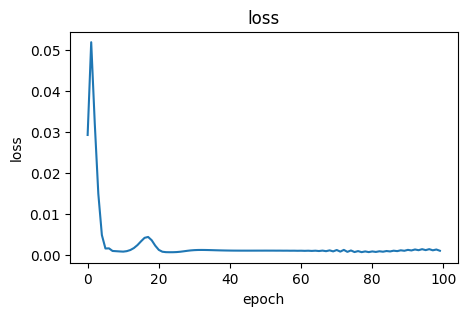

In [841]:
# 손실함수 그림 그리기
import matplotlib.pyplot as plt 

plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")

In [842]:
# 예측 
model.eval()

loss_test = 0.0
for data, target in dataloader_test:
    # GPU 보내기
    data = data.to(device)
    target = target.to(device)

    # 예측
    with torch.no_grad():
        pred = model(data)
        loss_test += criterion(pred, target) * batch_size
    
print((loss_test / len(dataset_test)).cpu().item())

0.0031996245961636305


In [843]:
testX_ts.shape

torch.Size([368, 7, 4])

In [844]:
# 오늘 오후
## 예측값 그려보기
model = model.to(device)
model.eval()

pred_history = []
for data, target in dataset_test:
    with torch.no_grad():
        data = data.to(device)

        # 예측
        pred = model(data.unsqueeze(dim=0))
        # print(f"TestX Tensor Shape: {data.shape}")
        # print(f"TestX Tensor Unsqueeze Shape: {data.unsqueeze(dim=0).shape}")
        # print(f"Pred: {pred}")
        # print(f"Pred 값 추출: {pred[0].item()}")

        # 저장
        pred_history.append(pred[0].item())

# scaler 되돌리기
print(f"pred의 shape: {np.array(pred_history).shape}")
print(f"pred의 Reshape(-1,1) 후 shape: {np.array(pred_history).reshape(-1,1).shape}")
print(f"testY_ts의 Shape: {testY_ts.shape}")
pred_inverse = scaler_y.inverse_transform(np.array(pred_history).reshape(-1,1))
testY_inverse = scaler_y.inverse_transform(testY_ts)


pred의 shape: (368,)
pred의 Reshape(-1,1) 후 shape: (368, 1)
testY_ts의 Shape: torch.Size([368, 1])


In [845]:
# 오늘 오후
## 예측값 그려보기
model = model.to("cpu")
model.eval()

pred_history = []
for i in range(len(testX_ts)):
    with torch.no_grad():
        # 예측
        pred = model(testX_ts[i].unsqueeze(dim=0))
        # print(f"TestX Tensor Shape: {testX_ts[i].shape}")
        # print(f"TestX Tensor Unsqueeze Shape: {testX_ts[i].unsqueeze(dim=0).shape}")
        # print(f"Pred: {pred}")
        # print(f"Pred 값 추출: {pred[0].item()}")

        # 저장
        pred_history.append(pred[0].item())

# scaler 되돌리기
print(f"pred의 shape: {np.array(pred_history).shape}")
print(f"pred의 Reshape(-1,1) 후 shape: {np.array(pred_history).reshape(-1,1).shape}")
print(f"testY_ts의 Shape: {testY_ts.shape}")
pred_inverse = scaler_y.inverse_transform(np.array(pred_history).reshape(-1,1))
testY_inverse = scaler_y.inverse_transform(testY_ts)


pred의 shape: (368,)
pred의 Reshape(-1,1) 후 shape: (368, 1)
testY_ts의 Shape: torch.Size([368, 1])


In [846]:
pred_inverse[:5]

array([[64414.18192174],
       [64443.25398125],
       [64911.36738897],
       [64086.10661334],
       [64306.55432664]])

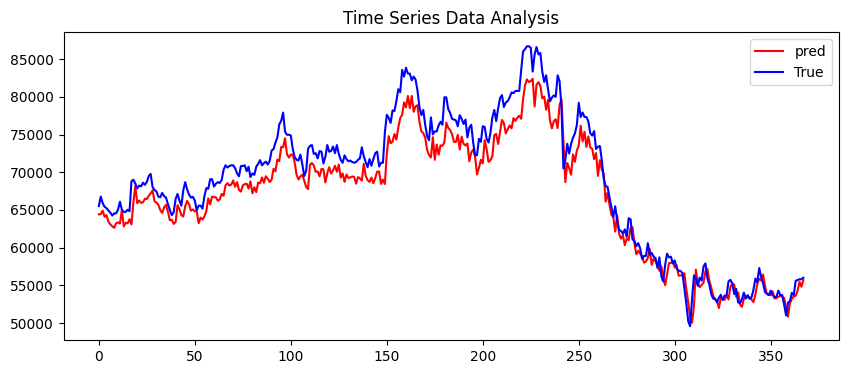

In [847]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label="pred", color="r")
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label="True", color="b")
plt.legend()
plt.title("Time Series Data Analysis")
plt.show()

## Attention 체험하기

In [864]:
import numpy as np

X = np.array([18, 17, 22])
exp_a = np.exp(X)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)

[0.01786798 0.00657326 0.97555875]


In [ ]:
[2, 1, 0] [0, 1, 3] [1, 2, 2]

In [865]:
print( 2 * y[0] + 0 * y[1] + 1 * y[2])
print( 1 * y[0] + 1 * y[1] + 2 * y[2])
print( 0 * y[0] + 3 * y[1] + 2 * y[2])

1.0112947186849954
1.9755587549443863
1.9708372994447


In [ ]:
### 쿼리: 내가 주목하려고 하는 것
### 키: 단어가 가진 정보

# 1. 입력값 임베딩
# 2. 쿼리 가중치(Wq)를 통해 쿼리 벡터 계산
# 3. 키 가중치(Wk)를 통해 키 벡터 계산
# 4. ⭐ Attention Score 계산 (유사도 계산 - 쿼리와 키의 내적)
# 5. 유사도 기반으로 가중치 계산
# 6. 가중치를 통해 Output 계산